同経路以外 : 38.09152421652421 ±7.52513937133762
[[3.000e+00 3.610e+02 1.508e+03]
 [1.000e+00 3.410e+02 1.530e+03]
 [0.000e+00 7.700e+01 1.795e+03]]


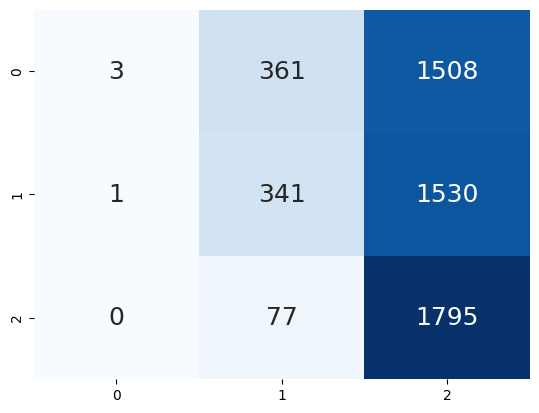

In [3]:
import numpy as np
import datetime
import seaborn as sns

WALK_PATH_NUM = 4
TRY_NUM = 3
LEAVE_PARIR_NUM = 4
val_acc = np.zeros([WALK_PATH_NUM, WALK_PATH_NUM, TRY_NUM, 52 // LEAVE_PARIR_NUM])
same_train_acc_list = np.zeros([WALK_PATH_NUM, TRY_NUM, 52 // LEAVE_PARIR_NUM])
diff_train_acc_list = np.zeros([WALK_PATH_NUM, WALK_PATH_NUM-1, TRY_NUM, 52 // LEAVE_PARIR_NUM])

conf_mat = np.zeros([WALK_PATH_NUM, WALK_PATH_NUM, TRY_NUM, 52 // LEAVE_PARIR_NUM, 3, 3])
same_conf_mat = np.zeros([3, 3])
diff_conf_mat = np.zeros([3, 3])

name = f"../results/walkpath/STGCN/MB_3DP0"
for k in range(TRY_NUM):
    for i in range(4):
        for j in range(4):
            for l in range(52 // LEAVE_PARIR_NUM):
                val_acc[i, j, k, l] = np.load(f"{name}/{k+1}/test/{i+1}-{j+1}/{l*LEAVE_PARIR_NUM+1}-{(l+1)*LEAVE_PARIR_NUM}/val_acc.npy")
                conf_mat[i, j, k, l] = np.load(f"{name}/{k+1}/test/{i+1}-{j+1}/{l*LEAVE_PARIR_NUM+1}-{(l+1)*LEAVE_PARIR_NUM}/conf_mat.npy")

for i in range(4):
    idx = 0
    a_idx = 0
    for j in range(4):
        if i == j:
            for k in range(TRY_NUM):
                for l in range(52 // LEAVE_PARIR_NUM):
                        same_train_acc_list[i, k, l] = val_acc[i, j, k, l]
                        same_conf_mat += conf_mat[i, j, k, l]
        else:
            for k in range(TRY_NUM):
                for l in range(52 // LEAVE_PARIR_NUM):
                    diff_train_acc_list[i, idx, k, l] = val_acc[i, j, k, l]
                    diff_conf_mat += conf_mat[i, j, k, l]

            idx += 1
                    
# print(f"同経路　　 :", np.mean(same_train_acc_list)*100, f"±{np.std(same_train_acc_list)*100}")
print(f"同経路以外 :", np.mean(diff_train_acc_list)*100, f"±{np.std(diff_train_acc_list)*100}")
sns.heatmap(diff_conf_mat.astype(int), annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"fontsize": 18})

print(diff_conf_mat)

In [1]:
import numpy as np
import datetime
import seaborn as sns

for gg in('0'):
    WALK_PATH_NUM = 4
    TRY_NUM = 3
    LEAVE_PARIR_NUM = 4
    val_acc = np.zeros([WALK_PATH_NUM, WALK_PATH_NUM, TRY_NUM, 52 // LEAVE_PARIR_NUM])
    same_train_acc_list = np.zeros([WALK_PATH_NUM, TRY_NUM, 52 // LEAVE_PARIR_NUM])
    diff_train_acc_list = np.zeros([WALK_PATH_NUM, WALK_PATH_NUM-1, TRY_NUM, 52 // LEAVE_PARIR_NUM])

    name = f"walk_path_leave_pair/{LEAVE_PARIR_NUM}/STGCN/AUG{gg}/test"

    for i in range(4):
        for j in range(4):
            for k in range(TRY_NUM):
                for l in range(52 // LEAVE_PARIR_NUM):
                    val_acc[i, j, k, l] = np.load(f"{name}/{i+1}-{j+1}/{k+1}/{l*LEAVE_PARIR_NUM+1}-{(l+1)*LEAVE_PARIR_NUM}/results/val_acc.npy")
                    

    for i in range(4):
        idx = 0
        a_idx = 0
        for j in range(4):
            if i == j:
                for k in range(TRY_NUM):
                    for l in range(52 // LEAVE_PARIR_NUM):
                            same_train_acc_list[i, k, l] = val_acc[i, j, k, l]
            else:
                for k in range(TRY_NUM):
                    for l in range(52 // LEAVE_PARIR_NUM):
                        diff_train_acc_list[i, idx, k, l] = val_acc[i, j, k, l]
                idx += 1
                        
            
    print(f"{gg} 同経路以外 :", np.mean(diff_train_acc_list)*100, f"±{np.std(diff_train_acc_list)*100}")

0 同経路以外 : 37.71509971509971 ±7.8042151365745385
